# **Welcome to the exciting world of movies!**



The film industry is constantly evolving and changing, with new technologies, trends, and audience preferences shaping the landscape.

In this project we will try to gain insights into the characteristics of the popular movies, and understand how these factors have contributed to their success. Through this analysis, we hope to uncover some interesting trends and patterns within the data and gain a deeper understanding of the movie industry in the 21st century.

We will also analyze various factors that can impact a movie's profitability, such as its genre, release date, and the lead actors and directors. By conducting this EDA, i hope to provide valuable insights into the factors that contribute to a movie's success.

The *DATASET* can be found here --> https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb

<img src='http://cdn.wallethub.com/wallethub/images/posts/13844/why-does-movie-popcorn-cost-so-much.jpg'>

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from re import sub

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from matplotlib.ticker import FuncFormatter


**Data exploration**

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [5]:
df.isna().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [6]:
df[df['Rating'].isna()]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
85,A Man Called Otto,NaN,2022,January,PG-13,126,Marc Forster,"Tom Hanks, Rachel Keller, Manuel Garcia Rulfo,...","Comedy, Drama",USA,Unknown,Unknown,"Sweden, United States"


In [7]:
df['Certificate'].value_counts(), df['Certificate'].isna().sum()

(R            867
 PG-13        714
 PG           225
 Not Rated     61
 TV-MA         40
 G             22
 TV-14         12
 TV-PG          9
 NC-17          6
 Unrated        6
 TV-G           3
 TV-Y7          1
 Name: Certificate, dtype: int64, 34)

In [8]:
df['Month'].value_counts()

November     260
December     249
October      187
June         166
July         152
September    151
March        150
August       149
January      148
May          144
April        121
February     121
2014           1
2008           1
Name: Month, dtype: int64

In [9]:
(df['Directors'].values == 'Unknown').sum(), (df['Stars'].values == 'Unknown').sum(), (df['Genre'].values == 'Unknown').sum()

(0, 0, 0)

In [10]:
(df['Filming_location'].values == 'Unknown').sum(), (df['Country_of_origin'].values == 'Unknown').sum(), 

(76, 0)

In [11]:
(df['Income'].values == 'Unknown').sum(), (df['Budget'].values == 'Unknown').sum(), (df['Runtime'].values == 'Unknown').sum()

(145, 304, 2)

**Data cleaning**

In [12]:
df.loc[df['Month'] == '2008', 'Month'] = 'June'
df.loc[df['Month'] == '2014', 'Month'] = 'July'

In [13]:
for i in df.loc[(df['Certificate'] == 'Unrated') | (df['Certificate'] == 'Not Rated') | (pd.isna(df['Certificate'])), 'Genre'].index :
  genre = df.iloc[i].Genre.split(',')[0]
  most_freq = df.Certificate[df['Genre'].str.contains(genre)].mode().item()
  df.loc[i, 'Certificate'] = most_freq

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.drop(df[(df['Year'] == 2022) & (df['Month'] == 'December')].index, inplace=True)

In [16]:
df = df[(df['Income'] != 'Unknown') & (df['Budget'] != 'Unknown')]

In [17]:
df['Runtime'] = df['Runtime'].astype(int)

<ipython-input-17-d19db9430b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'].astype(int)


In [18]:
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10 
}

In [19]:
for idx, value in enumerate(df['Budget']):
  if str(df.iloc[idx].Budget)[0] in conversion_dict.keys():
    df.loc[df['Budget'] == value, 'Budget'] = int(sub("[^0-9]", "", value)) * conversion_dict[df.iloc[idx].Budget[0]]

In [20]:
for idx, value in enumerate(df['Income']):
  if str(df.iloc[idx].Income)[0] == '$':
    df.loc[df['Income'] == value, 'Income'] = int(sub("[^0-9]", "", value))

**Explore the movies/ratings by year and genre**

In [21]:
sunburst = df[['Year', 'Genre', 'Title', 'Rating']].sort_values('Rating', ascending=False)
sunburst['Genre'] = sunburst['Genre'].apply(lambda x: x.split(', ')[0])

burst = px.sunburst(sunburst, 
                    path=['Year', 'Genre', 'Title'], 
                    values='Rating',
                    width=650, 
                    height=650
                    )

burst.show()

**Rating histogram**

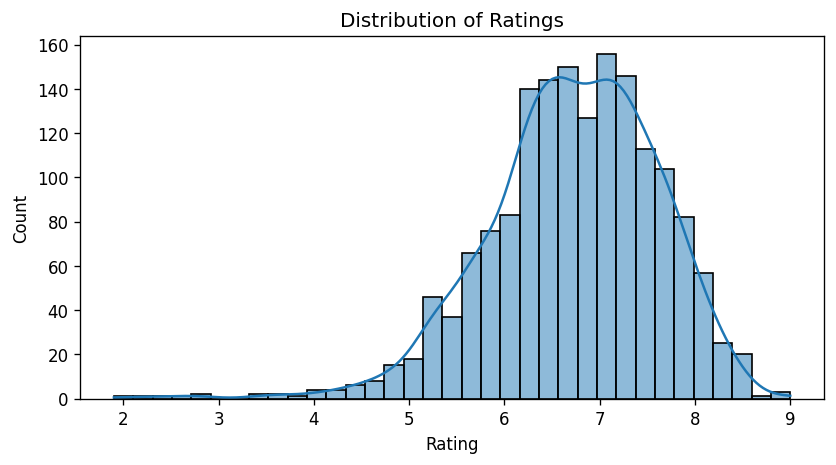

In [22]:
plt.figure(figsize=(8, 4), dpi=120)
sns.histplot(data=df,
             x=df.Rating,
             bins=35,
             kde=True)
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()

**Get most frequent items in columns**

In [23]:
def most_freq(col, elements):
  
  new_df = df[[col]].copy()
  new_df[col] = [x.split(', ') for x in new_df[col]]
  most_freq_elements = new_df[col].explode().value_counts().index[:10].tolist()

  return most_freq_elements

top_stars = most_freq('Stars', 10)
top_directors = most_freq('Directors', 10)
top_genre = most_freq('Genre', 10)
top_country_of_origin = most_freq('Country_of_origin', 10)

In [24]:
df['Profit'] = (df['Income'] - df['Budget']).apply(lambda x: round(x, -6))

**Top movies by profit**

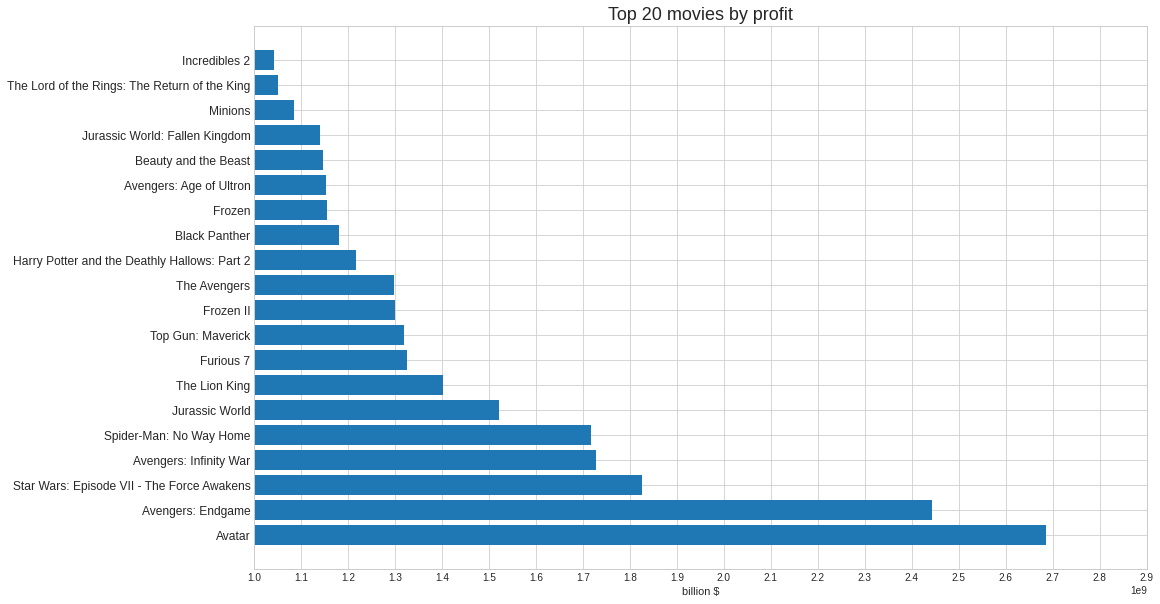

In [25]:
top_movies = df[['Title', 'Profit']].sort_values('Profit', ascending=False)[:20]

plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(16, 10))

plt.barh(top_movies.Title, top_movies.Profit)

plt.xlim(top_movies['Profit'].min(), top_movies['Profit'].max())
plt.xticks(ticks=np.arange(1, 3, 0.1) * 1e9)
plt.xlabel('billion $', fontsize=11)

plt.yticks(fontsize=12)

plt.title('Top 20 movies by profit', fontsize=18)

plt.show()

**Most popular and profitable type of movies**

In [26]:
movies_by_genre = {}
movies_by_country_of_origin = {}

for genre in top_genre:
  genre_len = len(df[df['Genre'].str.contains(genre)])
  movies_by_genre.update({genre: genre_len})


for country in top_country_of_origin:
  country_len = len(df[df['Country_of_origin'].str.contains(country)])
  movies_by_country_of_origin.update({country: country_len})

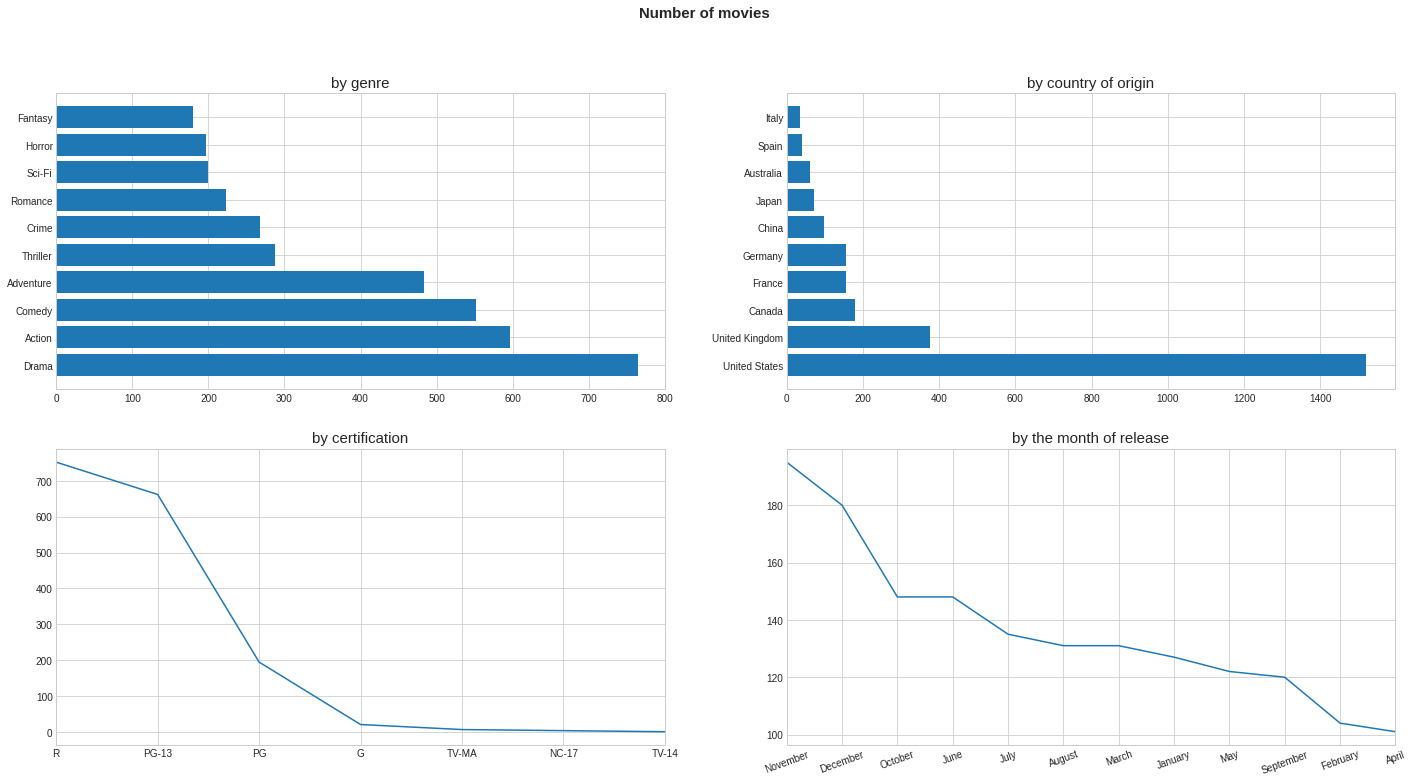

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(24,12),
                                             nrows=2,
                                             ncols=2)

fig.suptitle('Number of movies', fontweight='bold', fontsize=15)

ax1.barh(*zip(*movies_by_genre.items()))
ax1.set_title('by genre', fontsize=15)
ax1.set_xlim(right=8e2)

ax2.barh(*zip(*movies_by_country_of_origin.items()))
ax2.set_title('by country of origin', fontsize=15)

ax3.plot(df.Certificate.value_counts())
ax3.set_title('by certification', fontsize=15)
ax3.set_xlim(left=0, right=len(df.Certificate.value_counts())-1)

ax4.plot(df.Month.value_counts())
ax4.set_title('by the month of release', fontsize=15)
ax4.tick_params(axis='x', labelrotation=20)
ax4.set_xlim(left=0, right=len(df.Month.value_counts())-1);

In [28]:
profit_by_genre = {}
profit_by_country_of_origin = {}

profit_by_certificate = df.groupby(['Certificate'], as_index='Certificate')['Profit'].mean().sort_values(ascending=False)
profit_by_month = df.groupby(['Month'], as_index='Month')['Profit'].mean().sort_values(ascending=False)

for genre in top_genre:
  average_profit = df.loc[df['Genre'].str.contains(genre), 'Profit'].mean()
  profit_by_genre.update({genre: round(int(average_profit), -5)})

for country in top_country_of_origin:
  average_profit = df.loc[df['Country_of_origin'].str.contains(country), 'Profit'].mean()
  profit_by_country_of_origin.update({country: round(int(average_profit), -5)})


profit_by_genre = dict(sorted(profit_by_genre.items(), key=lambda x: x[1], reverse=True))
profit_by_country_of_origin = dict(sorted(profit_by_country_of_origin.items(), key=lambda x: x[1], reverse=True))

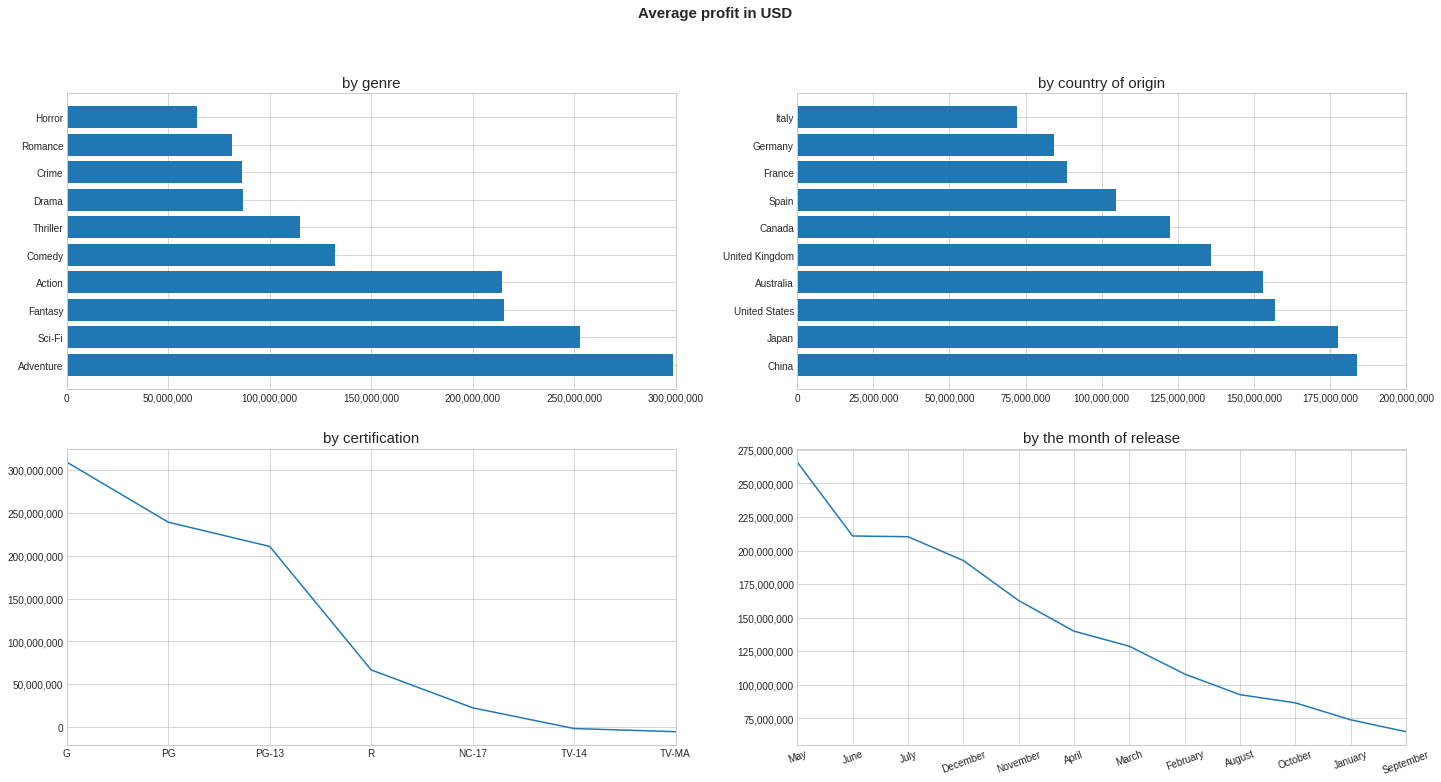

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(24,12),
                                             nrows=2,
                                             ncols=2)


fig.suptitle('Average profit in USD', fontweight='bold', fontsize=15)

ax1.barh(*zip(*profit_by_genre.items()))
ax1.set_title('by genre', fontsize=15)
ax1.set_xlim(right=3e8)
ax1.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.barh(*zip(*profit_by_country_of_origin.items()))
ax2.set_title('by country of origin', fontsize=15)
ax2.set_xlim(right=2e8)
ax2.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.plot(profit_by_certificate)
ax3.set_title('by certification', fontsize=15)
ax3.set_xlim(left=0, right=len(profit_by_certificate)-1)
ax3.get_yaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.plot(profit_by_month)
ax4.set_title('by the month of release', fontsize=15)
ax4.tick_params(axis='x', labelrotation=20)
ax4.set_xlim(left=0, right=len(profit_by_month)-1)
ax4.get_yaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

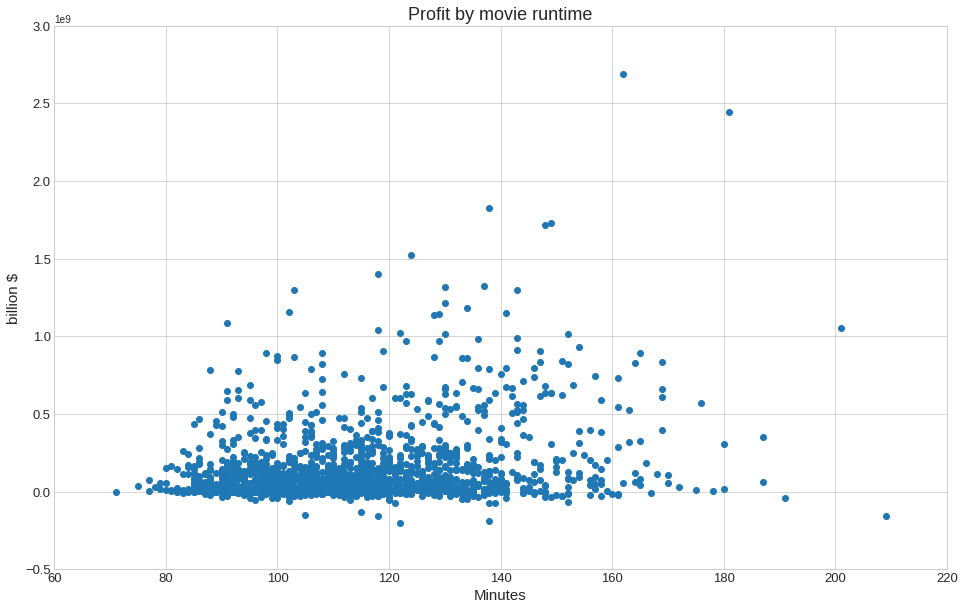

In [30]:
fig = plt.figure(figsize=(16, 10))

plt.scatter(df.Runtime, df.Profit)

plt.xlabel('Minutes', fontsize=15)
plt.xlim(60, 220)
plt.xticks(fontsize=13)

plt.ylabel('billion $', fontsize=15)
plt.ylim(-0.5e9, 3.0e9)
plt.yticks(fontsize=13)

plt.title('Profit by movie runtime', fontsize=18)
plt.show()

**Most popular and profitable directors/actors**

In [31]:
movies_by_stars = {}
profit_by_stars = {}
movies_by_directors = {}
profit_by_directors = {}


for star in top_stars:
  star_movies = df[df['Stars'].str.contains(star)]
  star_len = len(star_movies)
  average_profit = star_movies['Profit'].mean()
  
  movies_by_stars.update({star: star_len})
  profit_by_stars.update({star: round(int(average_profit), -5)})


for director in top_directors:
  director_movies = df[df['Directors'].str.contains(director)]
  director_len = len(director_movies)
  average_profit = director_movies['Profit'].mean()

  movies_by_directors.update({director: director_len})
  profit_by_directors.update({director: round(int(average_profit), -5)})

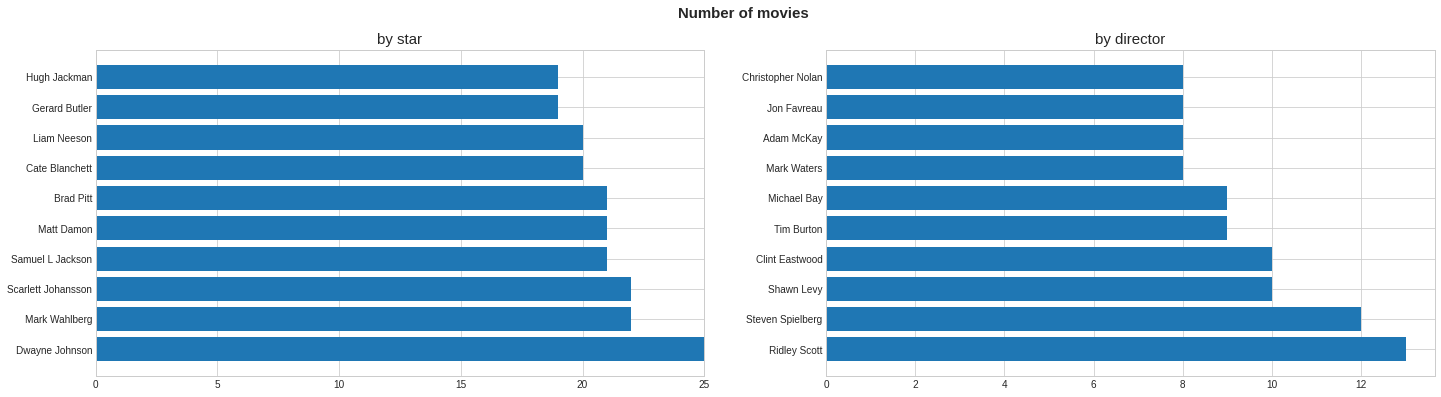

In [32]:
fig, (ax1, ax2) = plt.subplots(figsize=(24,6),
                               nrows=1,
                               ncols=2)


fig.suptitle('Number of movies', fontweight='bold', fontsize=15)

ax1.barh(*zip(*movies_by_stars.items()))
ax1.set_title('by star', fontsize=15)
ax1.set_xlim(right=movies_by_stars[max(movies_by_stars, key=movies_by_stars.get)])

ax2.barh(*zip(*movies_by_directors.items()))
ax2.set_title('by director', fontsize=15);

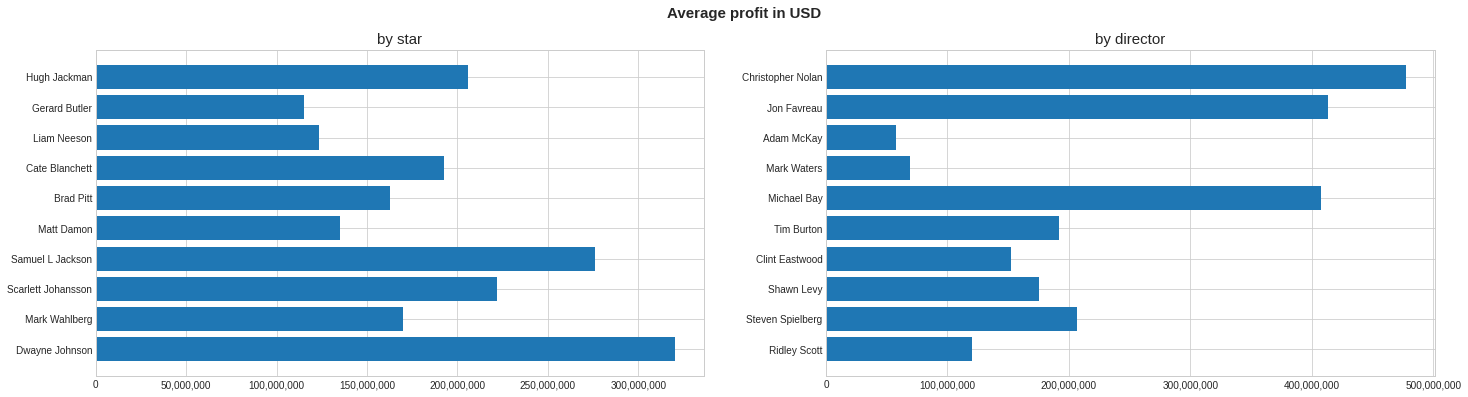

In [33]:
fig, (ax1, ax2) = plt.subplots(figsize=(24,6),
                               nrows=1,
                               ncols=2)


fig.suptitle('Average profit in USD', fontweight='bold', fontsize=15)

ax1.barh(*zip(*profit_by_stars.items()))
ax1.set_title('by star', fontsize=15)
ax1.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.barh(*zip(*profit_by_directors.items()))
ax2.set_title('by director', fontsize=15)
ax2.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

**Map of the filming locations**

In [34]:
try:
  import country_converter
except:
  !pip install country_converter
  import country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for country_converter: filename=country_converter-0.8.0-py3-none-any.whl size=55657 sha256=16f206e1a1dea3e9744617879fbe7ac330171feb12901ccda9a8ac0ec8bd45e0
  Stored in directory: /root/.cache/pip/wheels/c2/5a/f6/7187fa51e18f2ed105833a7f5c44a2475ace0c96e19118e608
Successfully built country_converter


In [35]:
df.Filming_location.value_counts()

USA           777
Canada        159
UK            141
Unknown        42
Australia      38
             ... 
Costa Rica      1
Norge           1
Space           1
Peru            1
Ecuador         1
Name: Filming_location, Length: 95, dtype: int64

In [36]:
filming_location = df['Filming_location'].value_counts().rename_axis('Country').reset_index(name='Number of movies')
filming_location.drop(filming_location[filming_location['Country'] == 'Unknown'].index, inplace=True)
filming_location['ISO'] = filming_location['Country'].apply(lambda x: country_converter.convert(names=x, to='ISO3', not_found='Unknown'))
filming_location.drop(filming_location[filming_location['ISO'] == 'Unknown'].index, inplace=True)

In [37]:
world_map = px.choropleth(filming_location,
                          locations='ISO',
                          color='Number of movies', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

**Titles wordcloud**

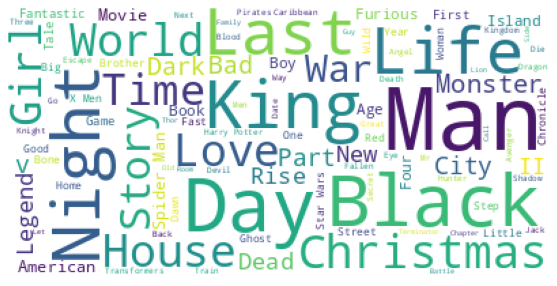

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

text = ' '.join(i for i in df.Title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100,).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off");

#**Conclusion**

What makes a movie popular?:

*   We can see that most popular movies belong to the following genres: Drama, Action, Comedy, Adventure
*   The months of October, November and December give the most movies (End of the year)
*   R and PG-13 certificates are the most widespread

What makes a movie profitable?:

*   We can see that most profitable movies belong to the following genres: Sci-Fi, Action, Fantasy, Adventure
*   The months of May, June and July give the most profitable movies
*   G, PG and PG-13 certificates are the most widespread






---


* We can also say that the actors who are part of the cast of a film have an important role in the profit but also in the popularity of that film. We can see that actors like Dwayne Johnson or Scarlett Johansson are part of the cast of many popular and profitable films.
* I don't think that filming location and country of origin have a very important role, although it makes sense that most of the locations are in the USA and Canada, since they are the biggest film producers.